In [446]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


Define our function, each one scaled with complexity. 

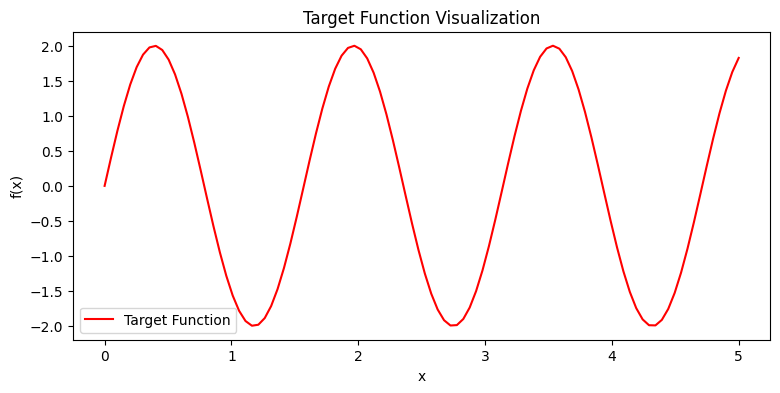

In [447]:
def f(x):
    return 2*np.sin(4*x)
    #return (2 * np.sin(6 * x)) * np.cos(2 * x) + (np.cos(9 * x) ** 220).flatten()
    #return np.sin(6*x) + np.cos(9*x)**220 + np.sin(np.exp(x))**44 / 2


# Here we plot our target function
x = np.linspace(0, 5, 100)
plt.figure(figsize=(9, 4))
plt.plot(x, f(x), 'r-', label='Target Function')
plt.title('Target Function Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


Standard squared exponential kernel, takes in two $N\times 1$ vectors, and calculates the euclidian distance between them.  

In [448]:
def kernel(x1, x2, length = 0.05, sigma_span = 1):
    sqr_dst = np.sum(x1 ** 2, axis=1).reshape(-1, 1) + np.sum(x2 ** 2, axis=1) - 2 * x1.dot(x2.T)
    return sigma_span * np.exp(-0.5 * (1 /(length*2) ) * sqr_dst)

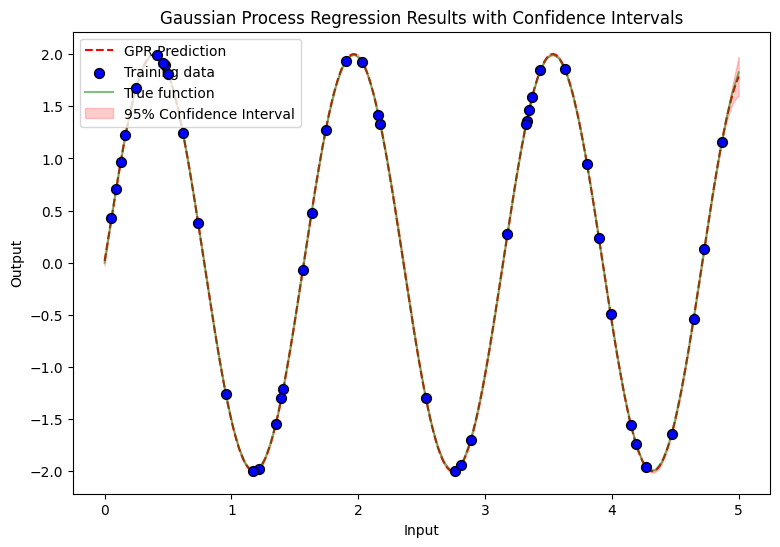

Mean Squared Error: 1.2256498605211153e-05


In [449]:
def GPR(N):

    #number of test points
    n = 5000
    noise = 0.00005


    X = np.random.uniform(0, 5, size=(N, 1)) #training inputs
    target_x = [f(x) + noise * np.random.randn() for x in X.flatten()]  #target inputs w/ added noise
    
    X_star = np.linspace(0, 5, n).reshape(-1, 1)

    #calculating covariance variables
    K = kernel(X, X)
    K_star = kernel(X, X_star)
    K_star_star = kernel(X_star, X_star)

    #next three lines used in calculation of f_star, our predictive mean
    L = np.linalg.cholesky(K + noise * np.eye(K.shape[0]))
    temp = np.linalg.solve(L, target_x)
    alpha = np.linalg.solve(L.T, temp)

    f_star = K_star.T @ alpha #our mean prediction

    #solve for our variance of the mean
    v = np.linalg.solve(L, K_star)
    var_f_star = K_star_star - v.T @ v

    return X, target_x, X_star, f_star, var_f_star

# vary the number of points our GPR is reliant on with N = 
N = 45
X, target_x, X_star, f_star, var_f_star = GPR(N)


# Plot the Gaussian Process Regression results with confidence intervals
plt.figure(figsize=(9, 6))
plt.plot(X_star.flatten(), f_star.flatten(), 'r--', label='GPR Prediction')
plt.scatter(X.flatten(), target_x, c='b', s=50, zorder=10, edgecolors=(0, 0, 0), label='Training data')
plt.plot(x, f(x), 'g-', label='True function', alpha=0.5)

# Plot confidence intervals
std_deviation = np.sqrt(np.diag(var_f_star)).flatten()  # Ensure std_deviation is 1-dimensional
plt.fill_between(X_star.flatten(), 
                 (f_star.flatten() - 2 * std_deviation), 
                 (f_star.flatten() + 2 * std_deviation), 
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('Gaussian Process Regression Results with Confidence Intervals')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')
plt.show()

#calculate and return our MSE 
def calculate_mse(actual, predicted):
    return np.mean((actual - predicted)**2)

mse = calculate_mse(f(X_star.flatten()), f_star.flatten())
print("Mean Squared Error:", mse)

